
A Leading AI & ML Organization is expanding its footprint in the area of NLP Sentiment analysis 

The Organization has engaged the services of Sai Science Pte Ltd and is looking for a robust sentiment analysis model to be built as part of the pilot phase of the program using dataset pertaining to movies review.


Importing Libraries

In [1]:
# Import libraries
import numpy as np
import seaborn as sns
import pandas as pd
import nltk
import re
import pandas as pd
import os
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import operator
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import time
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering


Loading Data

In [2]:
import os
path="C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\train\\pos"

data=[]
files=[path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files:
    with open(f, 'r', encoding='utf8') as myfile:
        data.append(myfile.read())

In [3]:
myfile

<_io.TextIOWrapper name='C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\train\\pos/9_7.txt' mode='r' encoding='utf8'>

In [4]:
files

['C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\train\\pos/0_9.txt',
 'C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\train\\pos/10000_8.txt',
 'C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\train\\pos/10001_10.txt',
 'C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\train\\pos/10002_7.txt',
 'C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\train\\pos/10003_8.txt',
 'C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\train\\pos/10004_8.txt',
 'C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\train\\pos/10005_7.txt',
 'C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\train\\pos/10006_7.txt',
 'C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\train\\pos/10007_7.txt',
 'C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\train\\pos/10008_7.txt',
 'C

In [5]:
train_df_pos= pd.DataFrame(data, columns=['review'])
train_df_pos['label']='pos'
train_df_pos.head()

,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,pos
1,Homelessness (or Houselessness as George Carli...,pos
2,Brilliant over-acting by Lesley Ann Warren. Be...,pos
3,This is easily the most underrated film inn th...,pos
4,This is not the typical Mel Brooks film. It wa...,pos


In [6]:
train_df_pos.shape

(12500, 2)

In [7]:
import os
path=path="C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\train\\neg"

data=[]
files=[path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files:
    with open(f, 'r', encoding='utf8') as myfile:
        data.append(myfile.read())

In [8]:
import pandas as pd
train_df_neg= pd.DataFrame(data, columns=['review'])
train_df_neg['label']='neg'
train_df_neg.head()

,review,label
0,Story of a man who has unnatural feelings for ...,neg
1,Airport '77 starts as a brand new luxury 747 p...,neg
2,This film lacked something I couldn't put my f...,neg
3,"Sorry everyone,,, I know this is supposed to b...",neg
4,When I was little my parents took me along to ...,neg


In [9]:
#concatenating dataframes of train_pos and train_neg in train_df
train_df=pd.concat([train_df_pos, train_df_neg], ignore_index=True)
train_df

,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,pos
1,Homelessness (or Houselessness as George Carli...,pos
2,Brilliant over-acting by Lesley Ann Warren. Be...,pos
3,This is easily the most underrated film inn th...,pos
4,This is not the typical Mel Brooks film. It wa...,pos
...,...,...
24995,"Towards the end of the movie, I felt it was to...",neg
24996,This is the kind of movie that my enemies cont...,neg
24997,I saw 'Descent' last night at the Stockholm Fi...,neg
24998,Some films that you pick up for a pound turn o...,neg


In [10]:
train_df_copy = train_df.copy()

In [11]:
import os
path=path="C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\test\\neg"

data=[]
files=[path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files:
    with open(f, 'r', encoding='utf8') as myfile:
        data.append(myfile.read())

In [12]:
test_df_neg= pd.DataFrame(data, columns=['review'])
test_df_neg['label']='neg'
test_df_neg.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [13]:
import os
path="C:\\Users\\Sairaman\\Downloads\\datascience\\Project\\Capstone\\aclImdb\\test\\pos"

data=[]
files=[path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]
for f in files:
    with open(f, 'r', encoding='utf8') as myfile:
        data.append(myfile.read())

In [14]:
test_df_pos= pd.DataFrame(data, columns=['review'])
test_df_pos['label']='pos'
test_df_pos.head()

,review,label
0,I went and saw this movie last night after bei...,pos
1,Actor turned director Bill Paxton follows up h...,pos
2,As a recreational golfer with some knowledge o...,pos
3,"I saw this film in a sneak preview, and it is ...",pos
4,Bill Paxton has taken the true story of the 19...,pos


In [15]:
#concatenating dataframe of test_pos and test_neg in test_df
test_df=pd.concat([test_df_pos, test_df_neg], ignore_index=True)
test_df

,review,label
0,I went and saw this movie last night after bei...,pos
1,Actor turned director Bill Paxton follows up h...,pos
2,As a recreational golfer with some knowledge o...,pos
3,"I saw this film in a sneak preview, and it is ...",pos
4,Bill Paxton has taken the true story of the 19...,pos
...,...,...
24995,I occasionally let my kids watch this garbage ...,neg
24996,When all we have anymore is pretty much realit...,neg
24997,The basic genre is a thriller intercut with an...,neg
24998,Four things intrigued me as to this film - fir...,neg


In [16]:
test_df_copy = test_df.copy()

NLP Pre-processing Pipeline Begins

1) Removing stopwords from data

2) Removing punctuations

3) Removing HTML Tags

4) Applying Stemming & Lemmatization

In [17]:
# Function for Removing Stop words
def Remove_SW(df):
    # Downloading stop words
    stop_words = set(stopwords.words('english'))

    # Removing Stop words from training data
    count = 0
    for sentence in df:
        sentence = [word for word in sentence.lower().split() if word not in stop_words]
        sentence = ' '.join(sentence)
        df.loc[count] = sentence
        count+=1
    return(df)

In [19]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    #text_nopunct = [char for char in text if char not in string.punctuation]
    return text_nopunct

train_df['review_clean'] = train_df['review'].apply(lambda x: remove_punct(x))

train_df.head()

,review,label,review_clean
0,Bromwell High is a cartoon comedy. It ran at t...,pos,Bromwell High is a cartoon comedy It ran at th...
1,Homelessness (or Houselessness as George Carli...,pos,Homelessness or Houselessness as George Carlin...
2,Brilliant over-acting by Lesley Ann Warren. Be...,pos,Brilliant overacting by Lesley Ann Warren Best...
3,This is easily the most underrated film inn th...,pos,This is easily the most underrated film inn th...
4,This is not the typical Mel Brooks film. It wa...,pos,This is not the typical Mel Brooks film It was...


In [20]:
#remove html and br tags from training and testing data
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def Remove_Tags(df):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in df]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in df]
    
    return df

In [21]:
# Lemmatizing
def Lemma(df):

    lmtzr = WordNetLemmatizer()

    count = 0
    stemmed = []
    for sentence in df:    
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            stemmed.append(lmtzr.lemmatize(word))
        sentence = ' '.join(stemmed)
        df.iloc[count] = sentence
        count+=1
        stemmed = []
    return(df)

In [22]:
# Stemming

def Stemma(df):

    stemmer = SnowballStemmer("english") #SnowballStemmer("english", ignore_stopwords=True)

    count = 0
    stemmed = []
    for sentence in df:
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            stemmed.append(stemmer.stem(word))
        sentence = ' '.join(stemmed)
        df.iloc[count] = sentence
        count+=1
        stemmed = []
    return(df)

In [23]:
train_df.head()

,review,label,review_clean
0,Bromwell High is a cartoon comedy. It ran at t...,pos,Bromwell High is a cartoon comedy It ran at th...
1,Homelessness (or Houselessness as George Carli...,pos,Homelessness or Houselessness as George Carlin...
2,Brilliant over-acting by Lesley Ann Warren. Be...,pos,Brilliant overacting by Lesley Ann Warren Best...
3,This is easily the most underrated film inn th...,pos,This is easily the most underrated film inn th...
4,This is not the typical Mel Brooks film. It wa...,pos,This is not the typical Mel Brooks film It was...


In [24]:
test_df.head()

,review,label
0,I went and saw this movie last night after bei...,pos
1,Actor turned director Bill Paxton follows up h...,pos
2,As a recreational golfer with some knowledge o...,pos
3,"I saw this film in a sneak preview, and it is ...",pos
4,Bill Paxton has taken the true story of the 19...,pos


In [25]:
###################################### Removing stopwords from Train set ##################################
train_df['review'] = Remove_SW(train_df['review'])
##################################### Removing Stop words from testing data ###################################

test_df['review'] = Remove_SW(test_df['review'])

In [26]:

###################################### Removing punctuations from Train set ##################################
train_df['review'] = train_df['review'].apply(lambda x: remove_punct(x))

###################################### Removing punctuations from Test set ###################################
test_df['review'] = test_df['review'].apply(lambda x: remove_punct(x))

In [27]:
train_df.head()

,review,label,review_clean
0,bromwell high cartoon comedy ran time programs...,pos,Bromwell High is a cartoon comedy It ran at th...
1,homelessness or houselessness george carlin st...,pos,Homelessness or Houselessness as George Carlin...
2,brilliant overacting lesley ann warren best dr...,pos,Brilliant overacting by Lesley Ann Warren Best...
3,easily underrated film inn brooks cannon sure ...,pos,This is easily the most underrated film inn th...
4,typical mel brooks film much less slapstick mo...,pos,This is not the typical Mel Brooks film It was...


In [28]:
###################################### Removing html tags from Train and Test set ###################################
train_df['review'] = Remove_Tags(train_df['review'])
test_df['review'] = Remove_Tags(test_df['review'])

In [29]:
############################################### Stemming And Lemmatizing Train set ##########################################

train_df['review'] = Lemma(train_df['review'])
train_df['review'] = Stemma(train_df['review'])

In [30]:
train_df.review

0        bromwel high cartoon comedi ran time program s...
1        homeless or houseless georg carlin state issu ...
2        brilliant overact lesley ann warren best drama...
3        easili underr film inn brook cannon sure flaw ...
4        typic mel brook film much le slapstick movi ac...
                               ...                        
24995    toward end movi felt technic felt like classro...
24996    kind movi enemi content watch time bloodi true...
24997    saw descent last night stockholm film festiv o...
24998    film pick pound turn rather good 23rd centuri ...
24999    one dumbest film ive ever seen rip near ever t...
Name: review, Length: 25000, dtype: object

In [31]:
############################################### Stemming and lemmatizing Test set ###########################################

test_df['review'] = Lemma(test_df['review'])
test_df['review'] = Stemma(test_df['review'])

In [32]:
train_df

,review,label,review_clean
0,bromwel high cartoon comedi ran time program s...,pos,Bromwell High is a cartoon comedy It ran at th...
1,homeless or houseless georg carlin state issu ...,pos,Homelessness or Houselessness as George Carlin...
2,brilliant overact lesley ann warren best drama...,pos,Brilliant overacting by Lesley Ann Warren Best...
3,easili underr film inn brook cannon sure flaw ...,pos,This is easily the most underrated film inn th...
4,typic mel brook film much le slapstick movi ac...,pos,This is not the typical Mel Brooks film It was...
...,...,...,...
24995,toward end movi felt technic felt like classro...,neg,Towards the end of the movie I felt it was too...
24996,kind movi enemi content watch time bloodi true...,neg,This is the kind of movie that my enemies cont...
24997,saw descent last night stockholm film festiv o...,neg,I saw Descent last night at the Stockholm Film...
24998,film pick pound turn rather good 23rd centuri ...,neg,Some films that you pick up for a pound turn o...


In [33]:
test_df

,review,label
0,went saw movi last night coax friend mine ill ...,pos
1,actor turn director bill paxton follow promis ...,pos
2,recreat golfer knowledg sport histori pleas di...,pos
3,saw film sneak preview delight cinematographi ...,pos
4,bill paxton taken true stori 1913 u golf open ...,pos
...,...,...
24995,occasion let kid watch garbag understand pathe...,neg
24996,anymor pretti much realiti tv show peopl make ...,neg
24997,basic genr thriller intercut uncomfort menagea...,neg
24998,four thing intrigu film first star car pope of...,neg


In [34]:
### End of Cleaning ###

Select Features

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Method Chosen - An extra-trees classifier. This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [35]:
# Function to get features
def Get_Feature(df, number):
    
    feature_list = []
    # create an instance for tree feature selection
    tree_clf = ExtraTreesClassifier()

    # first create arrays holding input and output data

    # Vectorizing Train set
    cv = CountVectorizer(analyzer='word')
    x_train = cv.fit_transform(df['review'])

    # Creating an object for Label Encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['label'])

    # fit the model
    tree_clf.fit(x_train, y)
    
    # Preparing variables
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
    indices = np.argsort(importances)[::-1]

    # Create the feature list
    for f in range(number):
        feature_list.append(sorted_features[f][0])
    
    return(feature_list)

In [36]:
# Function to Print Feature
def Print_Feature(df):
    
    # create an instance for tree feature selection
    tree_clf = ExtraTreesClassifier()

    # first create arrays holding input and output data

    # Vectorizing Train set
    cv = CountVectorizer(analyzer='word')
    x_train = cv.fit_transform(df['review'])

    # Creating an object for Label Encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['label'])

    # fit the model
    tree_clf.fit(x_train, y)

    # Preparing variables
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(20):
        print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

    # Plot the feature importances of the forest
    plt.figure(figsize = (20,20))
    plt.title("Feature  Ranking / Importance",fontsize=18)
    plt.xlabel('Feature Name',fontsize=18)
    plt.ylabel('Feature Importance',fontsize=18)
    plt.bar(range(20), importances[indices[:20]],
           color="g", align="center")
    plt.xticks(range(20), sorted_features[:20], rotation=90)
    plt.xlim([-1, 20])
    plt.show()

    return()

In [37]:
df1 = Get_Feature(train_df, 100)

In [38]:
print(df1)

['worst', 'bad', 'wast', 'great', 'aw', 'poor', 'excel', 'bore', 'stupid', 'wors', 'terribl', 'enjoy', 'love', 'even', 'perfect', 'horribl', 'favorit', 'noth', 'beauti', 'best', 'minut', 'suppos', 'ridicul', 'script', 'unless', 'crap', 'movi', 'laughabl', 'also', 'pathet', 'embarrass', 'plot', 'well', 'money', 'lame', 'act', 'mess', 'recommend', 'tri', 'disappoint', 'avoid', 'better', 'could', 'annoy', 'least', 'amaz', 'dull', 'perform', 'attempt', 'life', 'save', 'instead', 'pointless', 'wonder', 'would', 'lack', 'touch', 'superb', 'film', 'oh', 'look', 'brilliant', 'fantast', 'one', 'make', 'br', 'see', 'like', 'good', 'fail', 'still', 'especi', 'redeem', 'stori', 'cheap', 'definit', 'unfortun', 'alway', 'time', 'reason', 'watch', '410', 'thing', 'it', 'today', 'im', 'much', 'delight', 'this', 'get', '810', 'bother', 'year', 'unbeliev', 'world', 'seem', 'insult', 'show', 'realli', 'mani']


Feature ranking:
feature 7908 : bad (0.007133)
feature 89968 : worst (0.007080)
feature 87677 : wast (0.005404)
feature 34573 : great (0.005365)
feature 11434 : bore (0.003313)
feature 27495 : excel (0.003254)
feature 7512 : aw (0.002969)
feature 80194 : terribl (0.002966)
feature 89939 : wors (0.002815)
feature 62639 : poor (0.002633)
feature 77664 : stupid (0.002504)
feature 56595 : noth (0.002455)
feature 47952 : love (0.002417)
feature 9717 : best (0.002278)
feature 38637 : horribl (0.002093)
feature 27193 : even (0.002015)
feature 26408 : enjoy (0.001980)
feature 62154 : plot (0.001913)
feature 60848 : perfect (0.001860)
feature 70725 : script (0.001818)


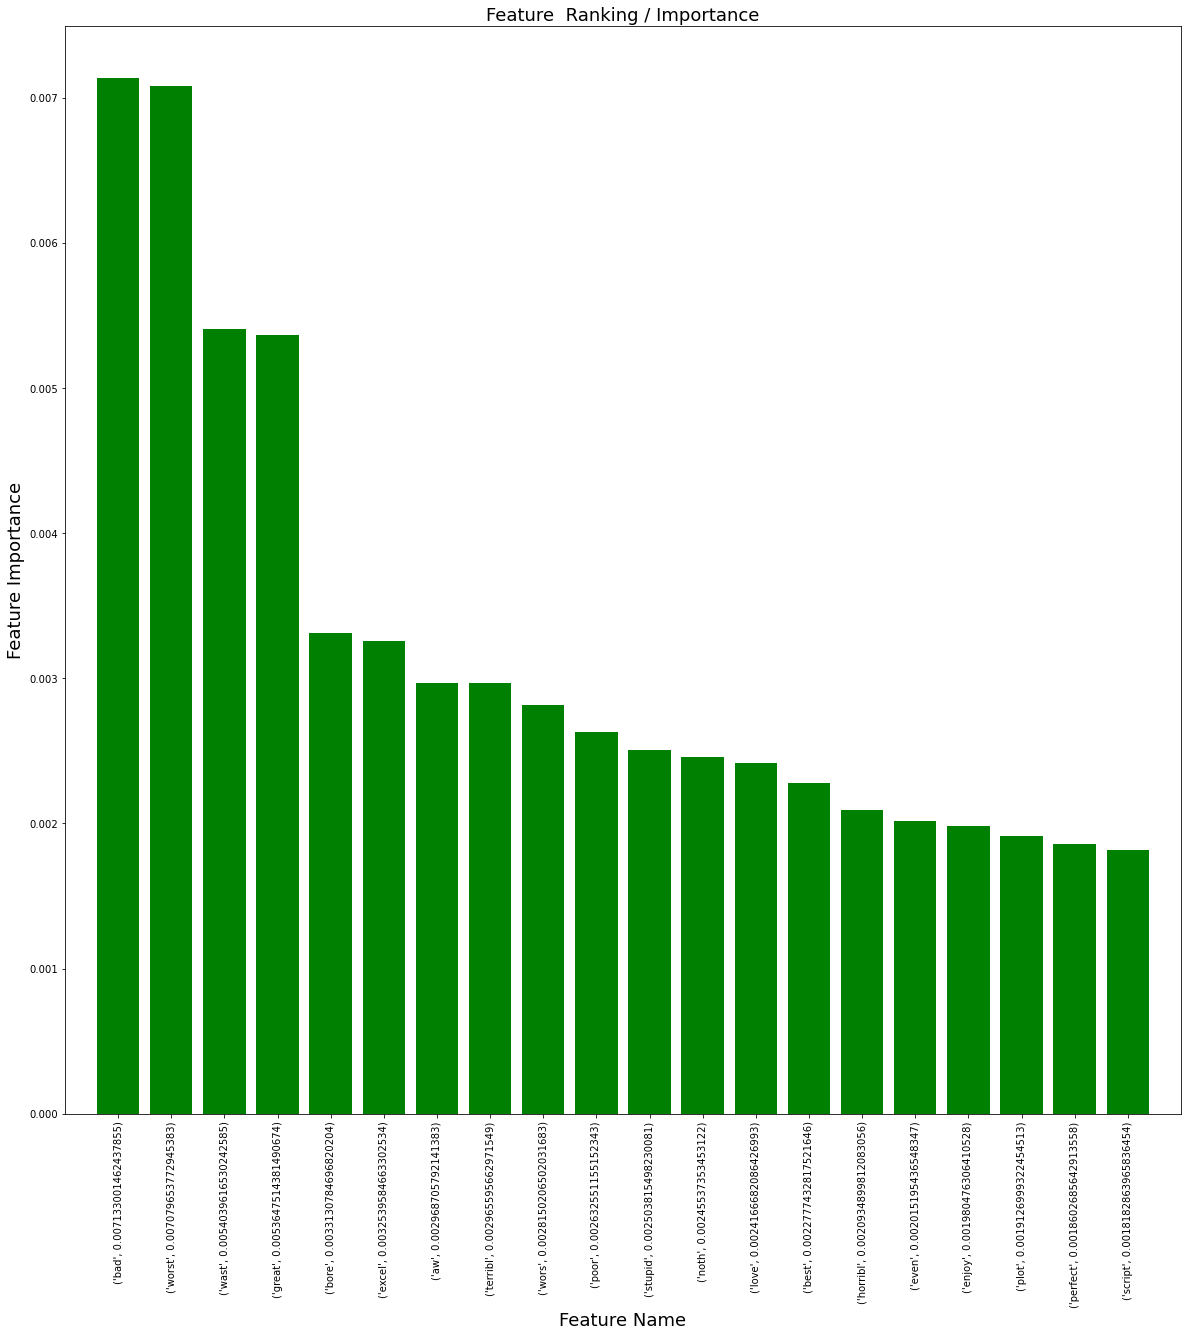

()

In [39]:
# Visualizing the Best Features
Print_Feature(train_df)

Feature ranking:
feature 88316 : worst (0.006367)
feature 85999 : wast (0.006034)
feature 7701 : bad (0.004964)
feature 34102 : great (0.004573)
feature 61466 : poor (0.003519)
feature 78708 : terribl (0.003494)
feature 7320 : aw (0.003160)
feature 11184 : bore (0.003129)
feature 27090 : excel (0.003020)
feature 47062 : love (0.002420)
feature 76978 : suppos (0.002415)
feature 9481 : best (0.002390)
feature 59638 : perfect (0.002347)
feature 38023 : horribl (0.002329)
feature 55491 : noth (0.002316)
feature 88294 : wors (0.002286)
feature 26813 : even (0.002113)
feature 51071 : minut (0.001912)
feature 76233 : stupid (0.001842)
feature 8766 : beauti (0.001755)


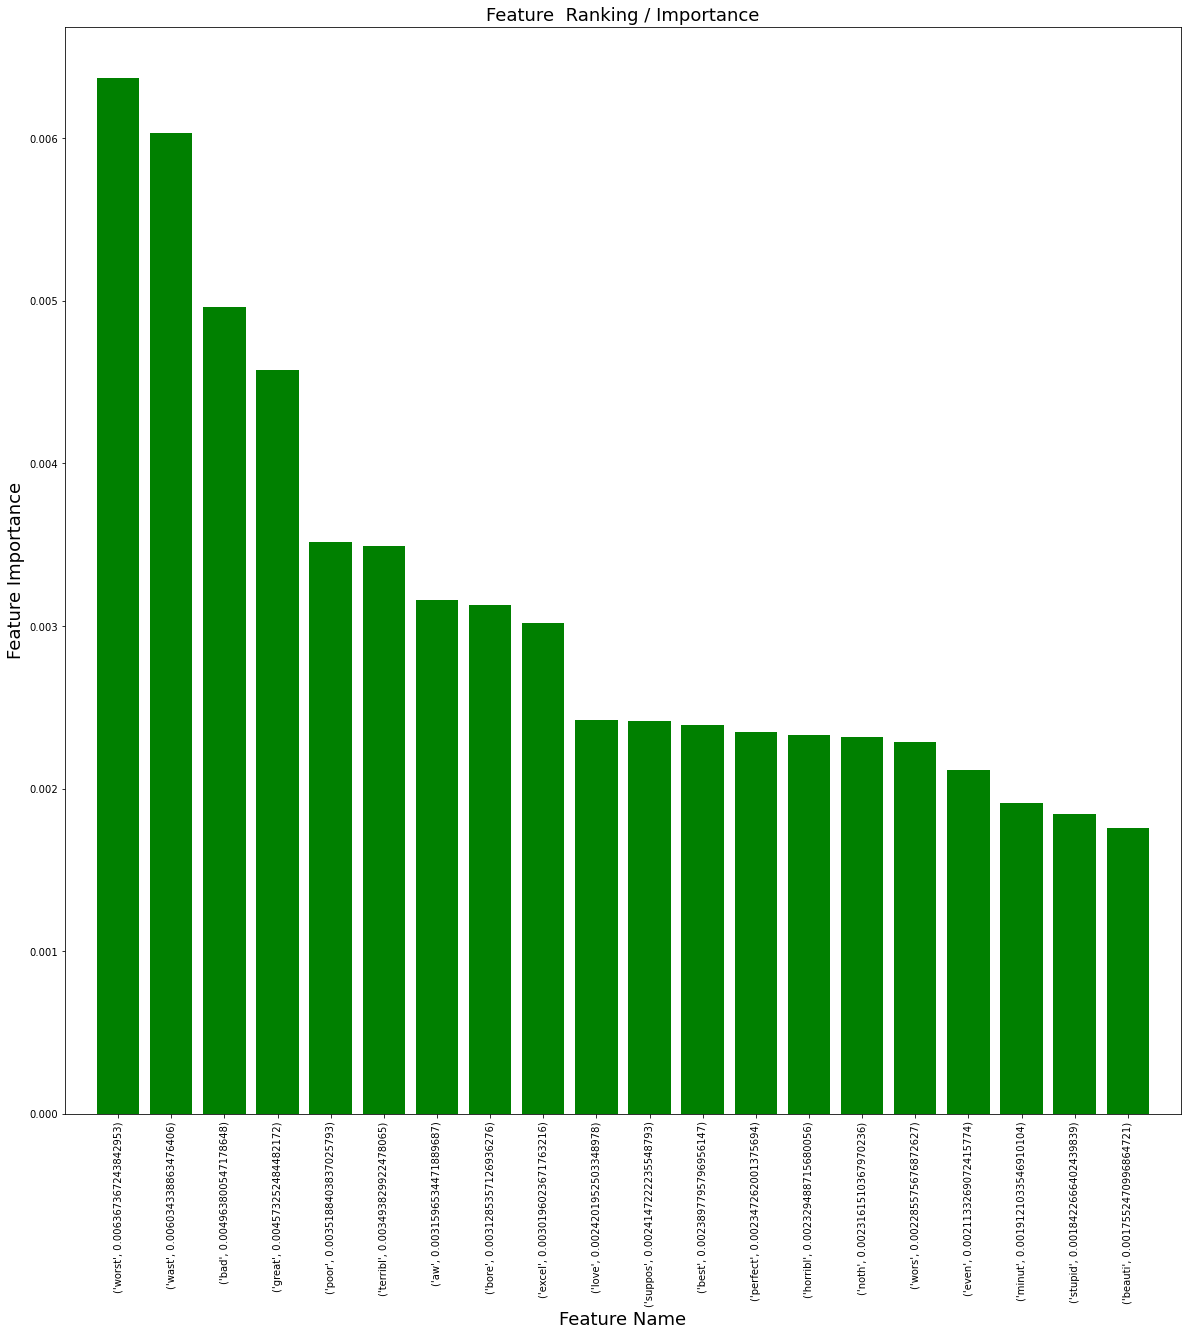

()

In [40]:
Print_Feature(test_df)

Exploration 

In [41]:
###################################### Negative set frequency of train and test combined ################################

# Creating a frequency dataframe of stemmed train and test data set
df_freq = pd.concat([train_df, test_df], ignore_index = True)

# Vectorizing negative reviews set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_neg = vect.fit_transform(df_freq[df_freq.label.isin(['neg'])].review)

# Visualising the high frequency words for negative set
df_freq = pd.DataFrame(vect_neg.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
df_freq.nlargest(20, 'frequency')

,frequency
br,58534
movi,55858
film,43071
like,24012
make,15423
bad,15198
watch,14686
good,14374
time,14329
charact,13964


In [42]:
###################################### Positive set frequency of train and test combined ################################

# Creating a frequency dataframe of stemmed train and test data set
df_freq = pd.concat([train_df, test_df], ignore_index = True)

# Vectorizing pos reviews set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_freq[df_freq.label.isin(['pos'])].review)

# Visualising the high frequency words for positive set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
df_freq.nlargest(20, 'frequency')

,frequency
br,55265
film,49013
movi,43112
like,19977
time,15466
good,14617
stori,13666
charact,13640
make,13188
great,13092


In [43]:
######################### Lowest and highest frequency words ###########################

# Creating a frequency dataframe of stemmed train and test data set
df_freq = pd.concat([train_df, test_df], ignore_index = True)

# Vectorizing complete review set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_freq.review)

# Visualising the high and low frequency words for complete set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
print(df_freq.nlargest(1, 'frequency'), sep='\n')
print(df_freq.nsmallest(1, 'frequency'), sep='\t')

    frequency
br     113799
               frequency
0000000000001          1


In [44]:
df_freq = pd.concat([train_df, test_df], ignore_index= True)


In [45]:
df_freq.shape

(50000, 3)

In [46]:
## Visualization - Create a word cloud with positive and negative words after cleansing ##

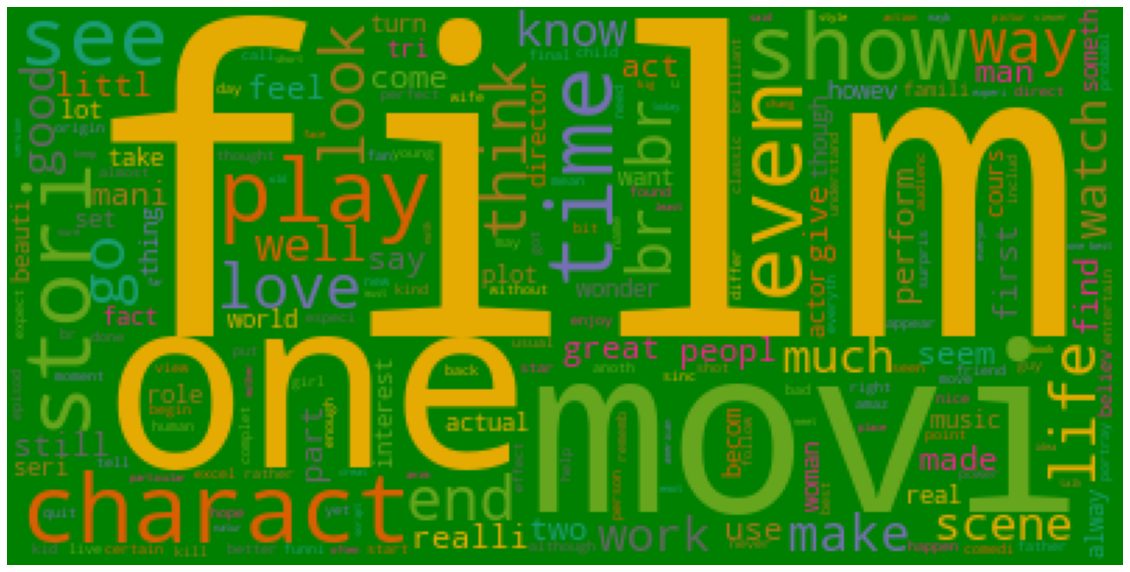

In [47]:
###############################################################################################################
# Creating a list of train and test data to analyse
wc = WordCloud(background_color="green", colormap="Dark2",
               max_font_size=150, random_state=42)
df_freq = pd.concat([train_df, test_df], ignore_index= True)
imdb_list = df_freq["review"][df_freq.label.isin(['pos'])].unique().tolist()
imdb_list_pos = " ".join(imdb_list)

# Create a word cloud for positive words
imdb_wordcloud = wc.generate(imdb_list_pos)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

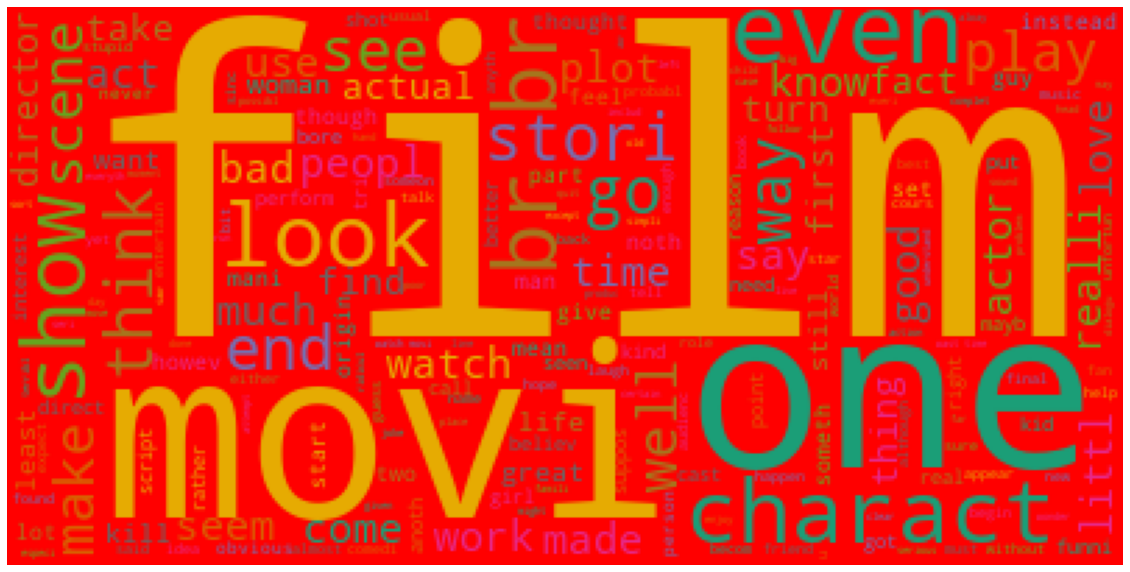

In [48]:
########################## WordCloud Negative Train & Test set ##################################
wc_n = WordCloud(background_color="red", colormap="Dark2",
               max_font_size=150, random_state=42)
# Creating a list of train and test data to analyse
df_freq = pd.concat([train_df, test_df], ignore_index = True)
imdb_list = df_freq["review"][df_freq.label.isin(['neg'])].unique().tolist()
imdb_list_neg = " ".join(imdb_list)

# Create a word cloud for negative words
imdb_wordcloud1 = wc_n.generate(imdb_list_neg)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud1)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

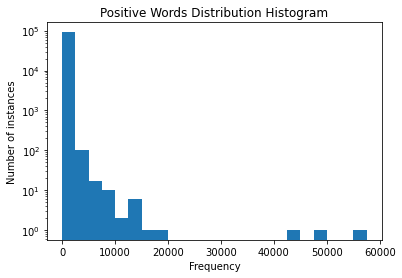

In [49]:
#Visualise the positive and negative words distribution using Histogram)
########################## Histogram Positive Train & Test set ##################################

#Combining cleaned train and test data
df_freq = pd.concat([train_df, test_df], ignore_index = True)

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_pos = hist_cv.fit_transform(df_freq[df_freq.label.isin(['pos'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Positive Words Distribution Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

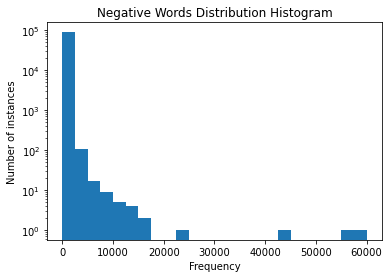

In [50]:

########################## Histogram Negative Train & Test set ##################################

#Combining cleaned train and test data
df_freq = pd.concat([train_df, test_df], ignore_index = True)

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_neg = hist_cv.fit_transform(df_freq[df_freq.label.isin(['neg'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_neg.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data, bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Negative Words Distribution Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

In [51]:
# Create word cloud & # Repeat visualization step 1 & 2 after feature selection and note the impact 

In [52]:
# feature selection output wordlist
df_freq = pd.concat([train_df, test_df], ignore_index = True)

word_list = Get_Feature(df_freq, 3000)

# Removing non prefered words from training and test combined data
count = 0
for sentence in df_freq['review']:
    sentence = [word for word in sentence.lower().split() if word in word_list]
    sentence = ' '.join(sentence)
    df_freq.loc[count, 'review'] = sentence
    count+=1

In [53]:
# feature selection output wordlist - train_df

word_list = Get_Feature(train_df, 3000)

# Removing non prefered words from training and test combined data
count = 0
for sentence in train_df['review']:
    sentence = [word for word in sentence.lower().split() if word in word_list]
    sentence = ' '.join(sentence)
    train_df.loc[count, 'review'] = sentence
    count+=1

In [54]:
# feature selection output wordlist - test_df

word_list = Get_Feature(test_df, 3000)

# Removing non prefered words from training and test combined data
count = 0
for sentence in test_df['review']:
    sentence = [word for word in sentence.lower().split() if word in word_list]
    sentence = ' '.join(sentence)
    test_df.loc[count, 'review'] = sentence
    count+=1

In [55]:
df_freq.sample(10)

,review,label,review_clean
42504,quit possibl worst sequel ever made script unf...,neg,NaN
29574,one best horror movi ive seen while eeri aband...,pos,NaN
15707,bad act bad write poor written film bad potent...,neg,Bad acting Bad writing This was a poorly writt...
1498,film may question made tv one best movi ive se...,pos,This film may have a questionable pedigree bec...
6344,music familiar right yes one usual hear about ...,pos,Ah a KellySinatra sailorsuit musical So famili...
1092,one question must ask immedi is would film mad...,pos,One question that must be asked immediately is...
22596,film basic writer parti five got hold made tv ...,neg,This film was basically Velvet Goldmine if the...
30857,two movi better even though hard list complex ...,pos,NaN
16654,hurt stop never want see anoth version christm...,neg,When will the hurting stop I never want to see...
20556,good actor and he direct famili film fine dire...,neg,Johnathan Frakes is a good actor and when hes ...


In [56]:
train_df.sample(10)

,review,label,review_clean
19927,they bother make movi anyon think br if look m...,neg,they bothered making this movie Anyone I didnt...
2298,yes flaw especi hollywood film demand lot effe...,pos,Yes its flawed especially if youre into Holly...
4950,saw theater instant thought good enough video ...,pos,I saw this in the theater and I instantly thou...
6994,film complet is keep one continu interest flas...,pos,The film is very complete in what it is keepin...
12224,in like everyon els comment movi brother year ...,pos,in our household Like everyone else who has co...
15791,come admit movi intend spoof zombi genr would ...,neg,If Todd Sheets were to come out and admit that...
3123,realli enjoy episod see flash green even thoug...,pos,I really enjoyed this episode Seeing The Flash...
824,difficult film comment on say bad well isnt eq...,pos,Difficult film to comment on how do you say it...
11466,start slow excel anim director bunch charact s...,pos,It started out slow after an excellent animate...
2714,enjoy film joy see version close vision peter ...,pos,I enjoyed this film It was a joy to see a vers...


Use Pickle to store the cleansed data

In [60]:
df_freq.to_pickle('pickledfiles/cl_fs_imdb_df.pkl')

In [61]:
train_df.to_pickle('pickledfiles/cl_train_df.pkl')

In [62]:
test_df.to_pickle('pickledfiles/cl_test_df.pkl')

In [63]:
fs_imdb_df = pd.read_pickle('pickledfiles/cl_fs_imdb_df.pkl')

In [64]:
fs_imdb_df.shape

(50000, 2)

In [65]:
fs_imdb_df.head()

,review,label
0,bromwel high cartoon comedi ran time program s...,pos
1,homeless or houseless georg carlin state issu ...,pos
2,brilliant over act lesley ann warren best dram...,pos
3,easili underr film inn brook cannon sure flaw ...,pos
4,typic mel brook film much le slapstick movi ac...,pos


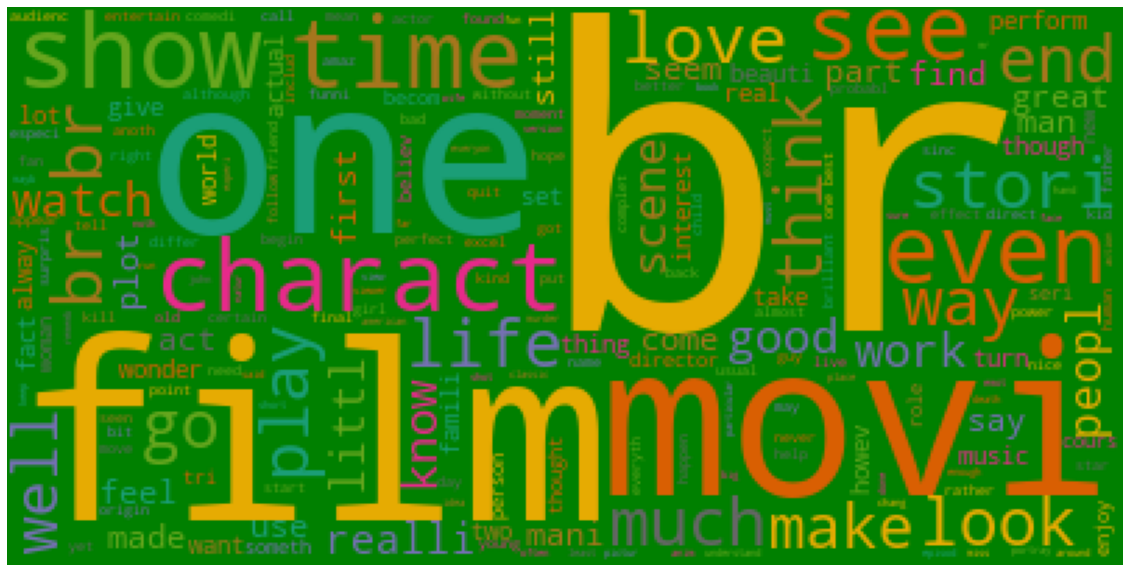

In [57]:
########################## WordCloud Positive Train & Test set post feature selection ##################################
wc = WordCloud(background_color="green", colormap="Dark2",
               max_font_size=150, random_state=42)
# Creating a list of train and test data to analyse
imdb_list = df_freq["review"][df_freq.label.isin(['pos'])].unique().tolist()
imdb_list_pos = " ".join(imdb_list)

# Create a word cloud for psitive words
imdb_wordcloud = wc.generate(imdb_list_pos)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

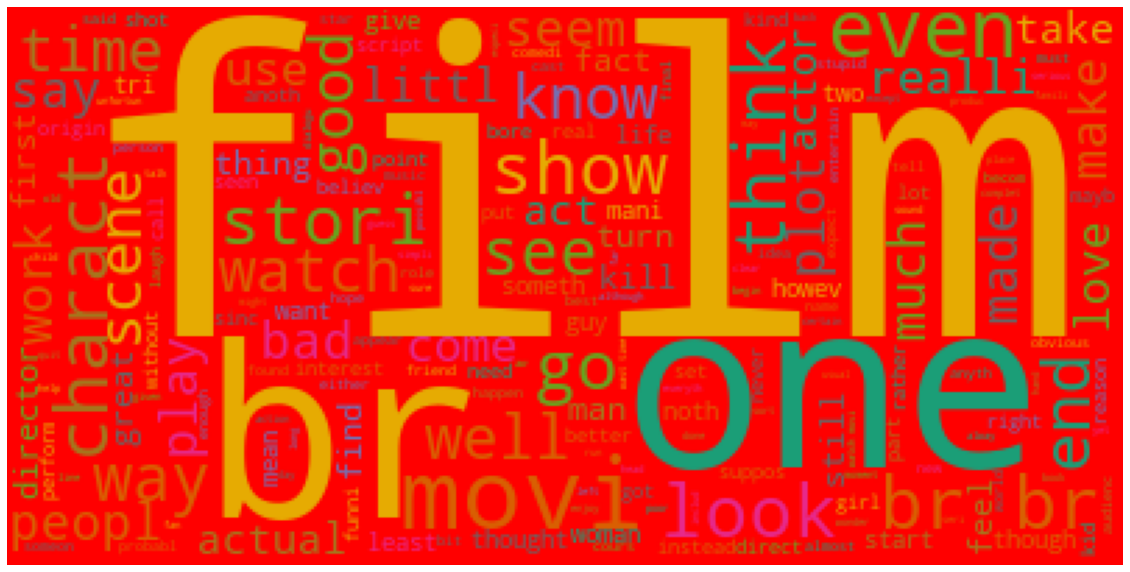

In [58]:

########################## WordCloud Negative Train & Test set post feature selection ##################################
wc_n = WordCloud(background_color="red", colormap="Dark2",
               max_font_size=150, random_state=42)
# Creating a list of ham data only to analyse
imdb_list = df_freq["review"][df_freq.label.isin(['neg'])].unique().tolist()
imdb_list_neg = " ".join(imdb_list)

# Create a word cloud for ham
imdb_wordcloud = wc_n.generate(imdb_list_neg)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [61]:
# Repeat visualization step 1 & 2 after feature selection and note the impact 

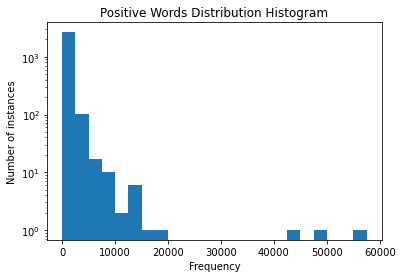

In [63]:
########################## Histogram Positive Train & Test set post feature selection ##################################

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_pos = hist_cv.fit_transform(df_freq[df_freq.label.isin(['pos'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data, bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Positive Words Distribution Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

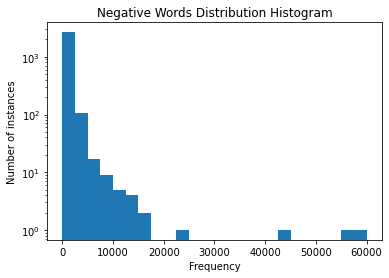

In [65]:
########################## Histogram Negative Train & Test set post feature selection ##################################

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_pos = hist_cv.fit_transform(df_freq[df_freq.label.isin(['neg'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data, bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Negative Words Distribution Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()


In [ ]:
### This ends Part 1 ####